# black friday sales analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


#  dataset walkthrough

In [2]:
data = pd.read_csv("BlackFriday.csv")

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
df = data.drop(["Product_Category_2" , "Product_Category_3"],axis = 1)

In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


#  analyze the columns

In [9]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [10]:
df["User_ID"].nunique()

5891

In [11]:
df["Product_ID"].nunique()

3623

In [12]:
df["Gender"].nunique()

2

In [13]:
df["Occupation"].nunique()

21

In [14]:
df["Stay_In_Current_City_Years"].nunique()

5

In [15]:
df["Marital_Status"].nunique()

2

In [16]:
df["Product_Category_1"].nunique()

18

In [17]:
df["Purchase"].nunique()

17959

In [18]:
for i in df.columns:
    print(i , ":" , df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# analyze the gender column

In [19]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: ylabel='ratio'>

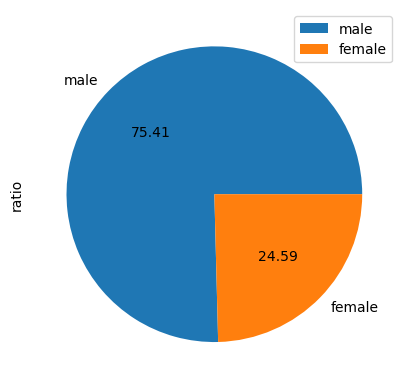

In [20]:
gender = pd.DataFrame({"ratio" : [len(df[df["Gender"] == "M"]) , len(df[df["Gender"] == "F"])]} , index = ["male" , "female"])
gender.plot.pie(y = "ratio",autopct = "%.2f")

In [21]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'gender ratio'}>

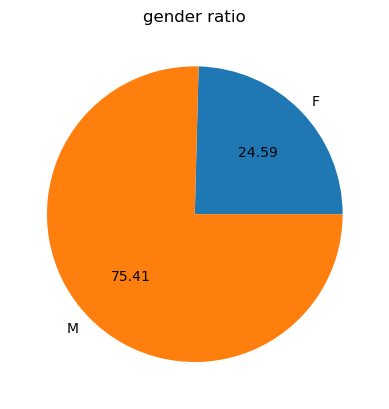

In [22]:
df.groupby("Gender").size().plot(kind = "pie" , autopct = "%.2f" , title = "gender ratio")

<Axes: title={'center': 'gender ratio'}, xlabel='Gender'>

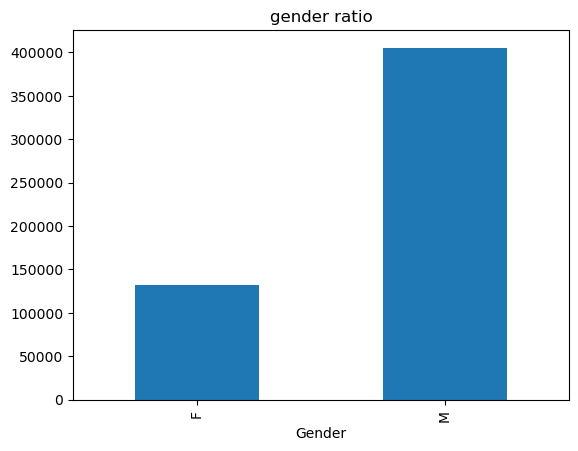

In [23]:
df.groupby("Gender").size().plot(kind = "bar" , title = "gender ratio" )

In [24]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


# analyzing age column

In [25]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: xlabel='Age'>

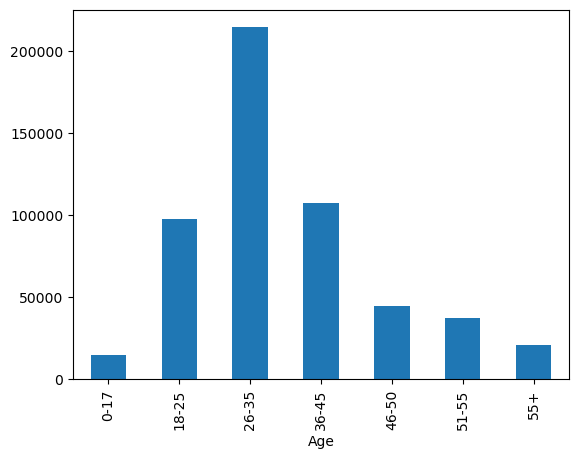

In [26]:
df.groupby("Age").size().plot(kind = "bar")

<Axes: xlabel='Age'>

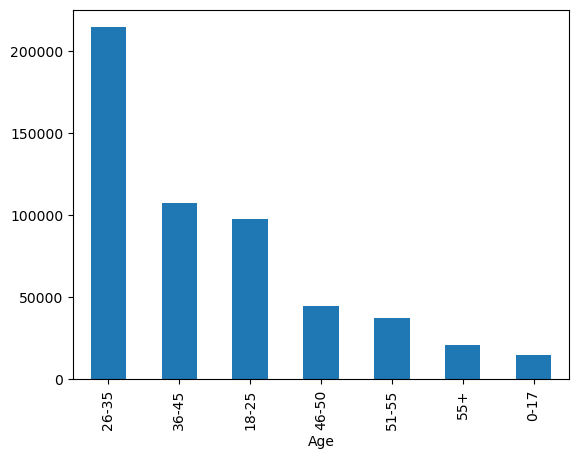

In [27]:
df["Age"].value_counts().plot(kind = "bar")

# analyze the occupation column

In [28]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: title={'center': 'Occupation'}, xlabel='Occupation'>

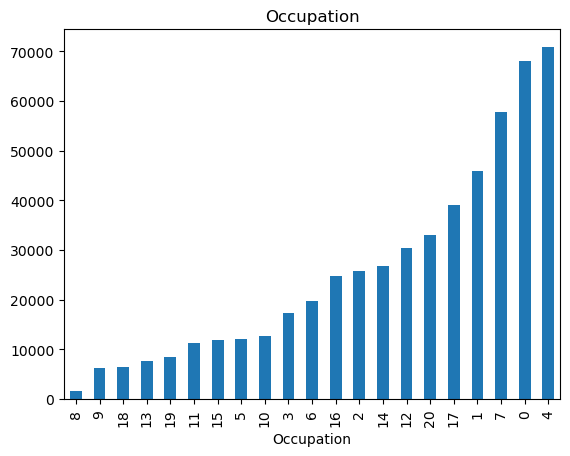

In [29]:
df.groupby("Occupation").size().sort_values().plot(kind = "bar" , title = "Occupation")
#we have to seen here majority of people comes under 4th occupation

<Axes: title={'center': 'Occupation'}, ylabel='count'>

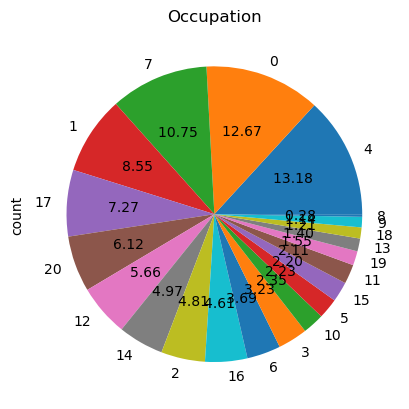

In [30]:
df["Occupation"].value_counts().plot(kind = "pie", autopct = "%.2f " , title = "Occupation")

# analyze City_Category column

<Axes: title={'center': 'City_Category'}, xlabel='City_Category'>

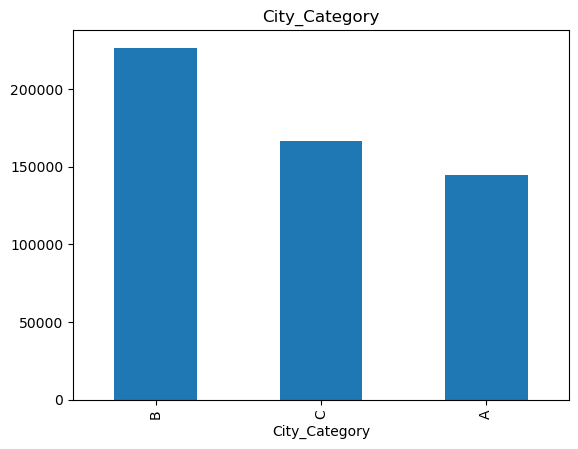

In [31]:
df["City_Category"].value_counts().plot(kind = "bar" , title = "City_Category")
# here category B have majority pepole

<Axes: title={'center': 'City_Category'}>

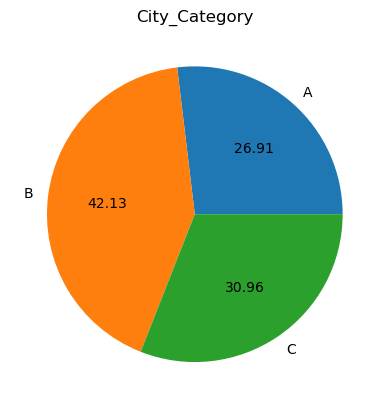

In [32]:
df.groupby("City_Category").size().plot(kind = "pie", autopct = "%.2f" , title = "City_Category")

# analyze the Stay_In_Current_City_Years column .

<Axes: title={'center': 'Stay_In_Current_City_Years'}, xlabel='Stay_In_Current_City_Years'>

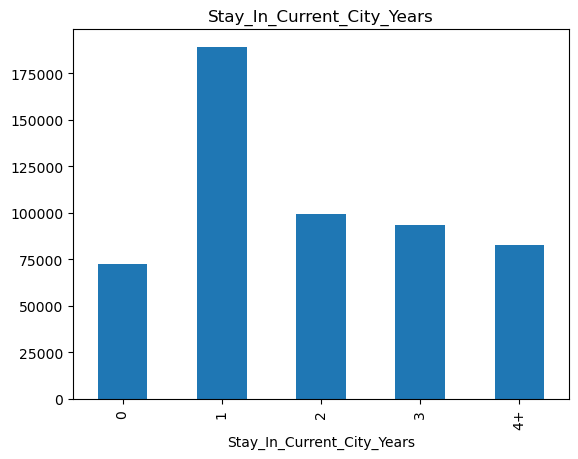

In [33]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind = "bar" , title = "Stay_In_Current_City_Years")

<Axes: ylabel='count'>

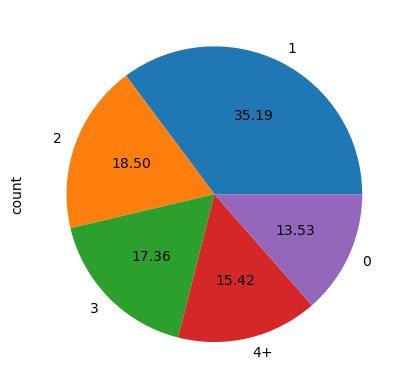

In [34]:
df["Stay_In_Current_City_Years"].value_counts().plot(kind = "pie", autopct = "%.2f")

In [35]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


# analyze the Marital_Status column

<Axes: title={'center': 'Marital_Status'}, xlabel='Marital_Status'>

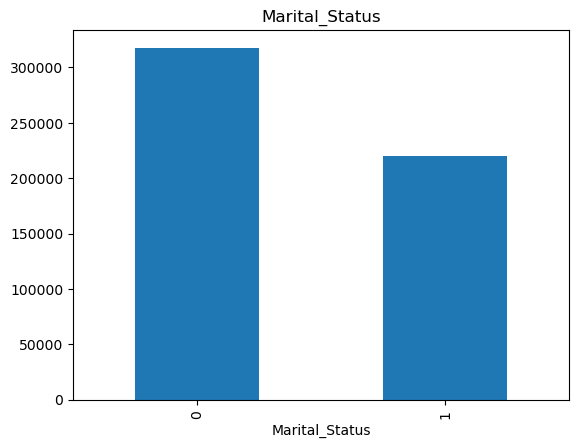

In [36]:
df["Marital_Status"].value_counts().plot(kind = "bar" , title = "Marital_Status")

<Axes: title={'center': 'Marital_Status'}>

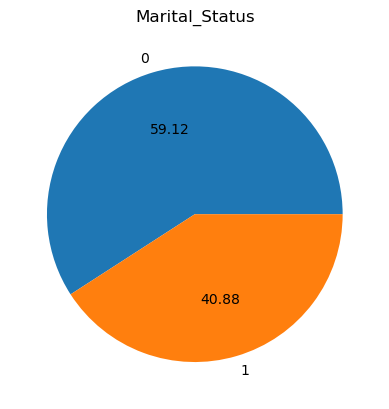

In [37]:
df.groupby("Marital_Status").size().plot(kind = "pie" , autopct = "%.2f", title = "Marital_Status")

# analyze the Product_Category_1 column

<Axes: title={'center': 'Product_Category_1'}, xlabel='Product_Category_1'>

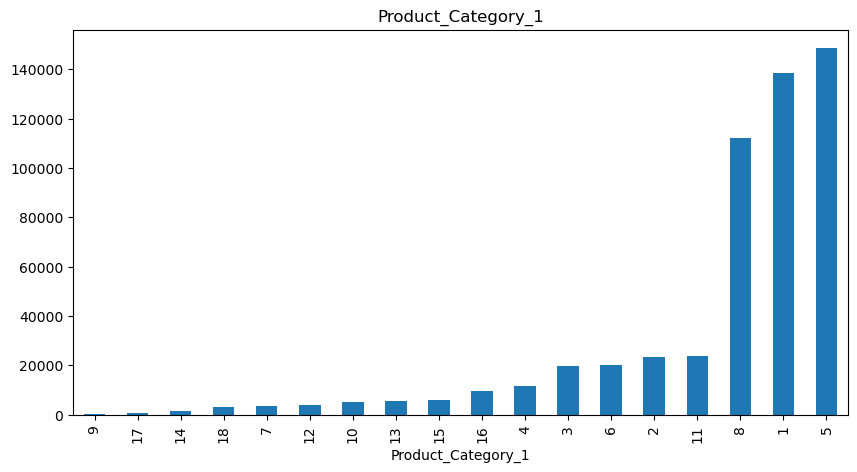

In [38]:
df.groupby("Product_Category_1").size().sort_values().plot(kind = "bar" , title = "Product_Category_1" , figsize = (10,5))

# Bivariate analysis 

Bivariate analysis is a statastical analysis its analyze 2 varaibles or 2 colums at time 

In [39]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


# analyze the age and gender column

<Axes: xlabel='Age', ylabel='count'>

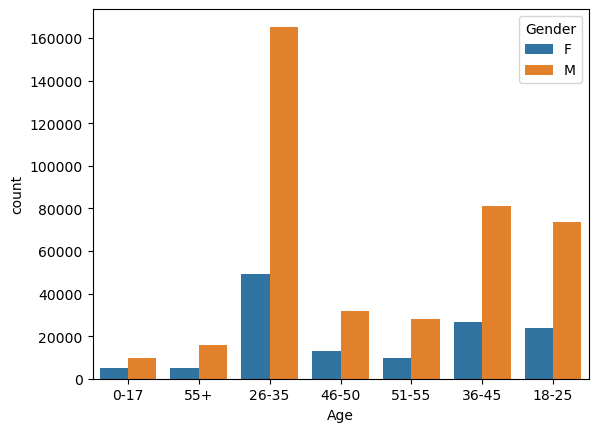

In [40]:
sns.countplot(x = "Age" , hue = "Gender" , data = df)

<Axes: xlabel='Gender', ylabel='count'>

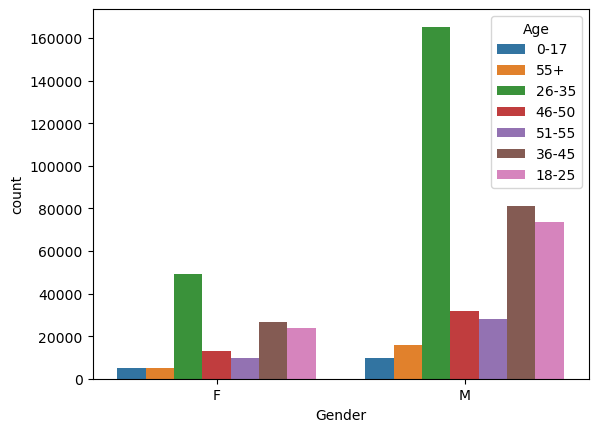

In [41]:
sns.countplot(x = "Gender" , hue = "Age" , data = df)

# analyze the gender with occupation column

<Axes: xlabel='Gender', ylabel='count'>

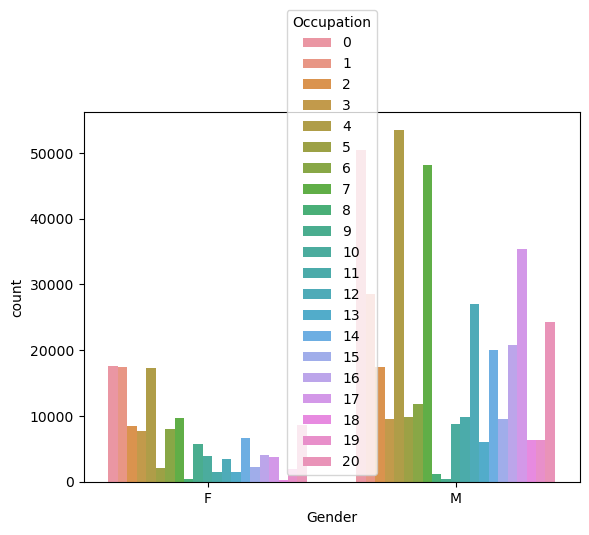

In [42]:
sns.countplot(data = df , x = "Gender" , hue = "Occupation")

<Axes: xlabel='Gender', ylabel='count'>

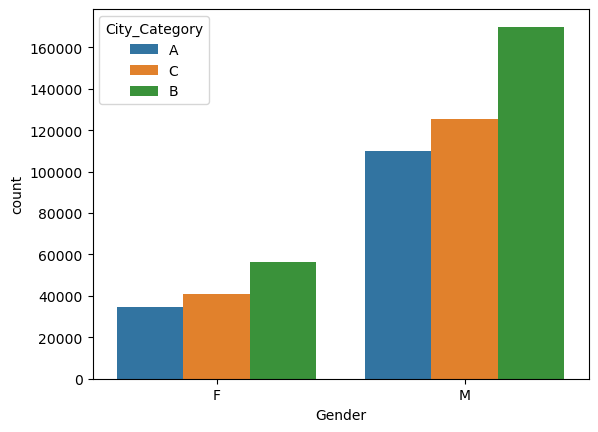

In [43]:
sns.countplot(data = df , x = "Gender" , hue = "City_Category")

<Axes: xlabel='City_Category', ylabel='count'>

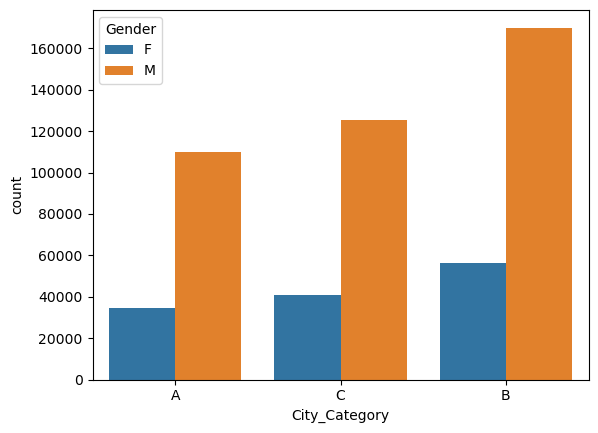

In [44]:
sns.countplot(data = df , x = "City_Category" , hue = "Gender")

# analyze Gender with Stay_In_Current_City_Years column

In [45]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: xlabel='Gender', ylabel='count'>

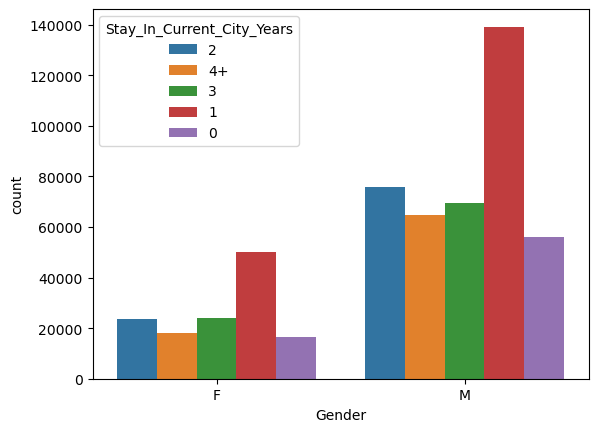

In [46]:
sns.countplot(data = df , x = "Gender" , hue = "Stay_In_Current_City_Years")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

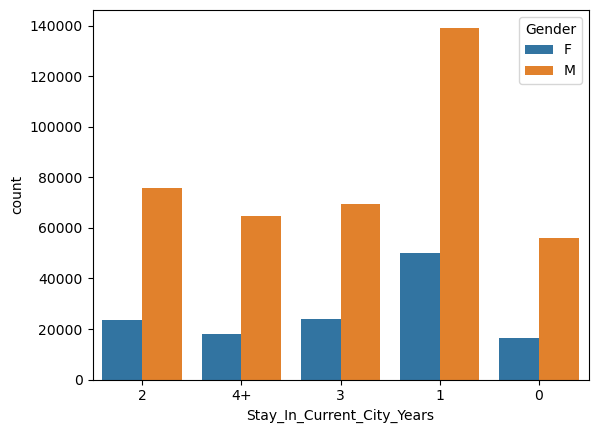

In [47]:
sns.countplot(data = df , x = "Stay_In_Current_City_Years" , hue = "Gender")

# Gender with Marital_Status

<Axes: xlabel='Gender', ylabel='count'>

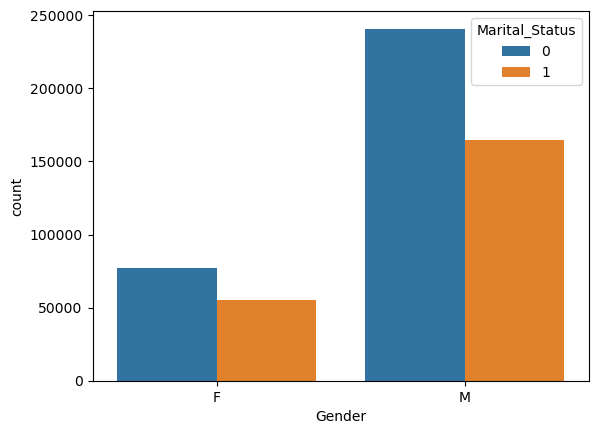

In [48]:
sns.countplot(data =df , x = "Gender", hue = "Marital_Status" )

# Gender with product_category_1

<Axes: xlabel='Gender', ylabel='count'>

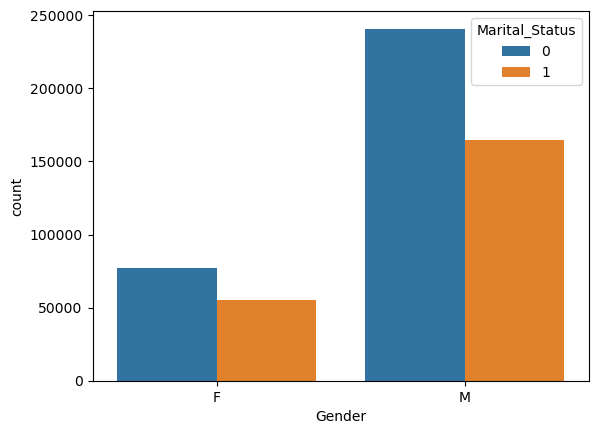

In [49]:
sns.countplot(data = df , x = "Gender" , hue = "Marital_Status")

In [50]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: xlabel='Age'>

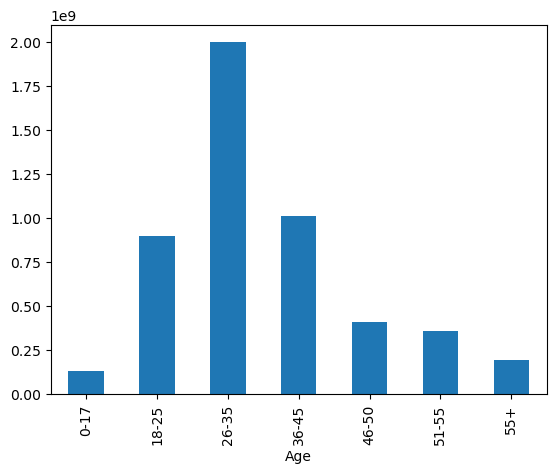

In [51]:
df.groupby("Age").sum()["Purchase"].plot(kind = "bar")

<Axes: ylabel='Purchase'>

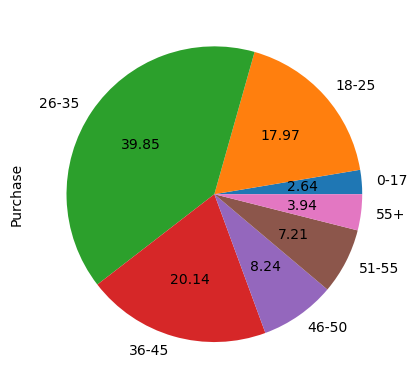

In [52]:
df.groupby("Age").sum()["Purchase"].plot(kind = "pie" , autopct = "%.2f")

In [ ]:
df.groupby("City_Category").sum()["Purchase"].plot(kind = "bar")

In [ ]:
df.groupby("Occupation").sum()["Purchase"].plot(kind = "bar")

In [ ]:
df.groupby("City_Category").sum()["Purchase"].plot(kind = "bar")